## Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM»

### Задание

<b>Цель:</b> изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.<p>
<b>Описание задания:</b><p>
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с <a href="https://www.cs.toronto.edu/~delve/data/adult/desc.html" target="_blank">сайта</a>.
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по <a href="http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html" target="_blank">ссылке</a>.
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.<p>
<b>Этапы работы:</b><p>
- Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
- Проведите первичный анализ.
- Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
- Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
- Преобразуйте категориальные признаки.
- Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
- Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
- Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
- Сформулируйте выводы по проделанной работе.
- Кратко опишите какие преобразования были сделаны с данными.
- Сравните точность двух моделей.
- Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат?

Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.<p>
<b>Результат:</b>
получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.<p>
<b>Форма выполнения:</b> ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.<p>
<b>Инструменты:</b> Jupyter Notebook/Google Colab; GitHub.<p>
<b>Срок выполнения:</b> 7 календарных дней

<b>*Рекомендации к выполнению:</b><p>
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

____

### Решение:

In [110]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 


In [111]:
# датасет - https://www.cs.toronto.edu/~delve/data/adult/desc.html (у меня локально)

data = pd.read_csv('adult.csv', na_values='?') 

data.head(10) # Вывожу первые 10 записей для понимания структуры данных и что там находиться
# так же можно вывести последние 10 записей, все зависит от предпочтений data.tail(10)
# print(data.shape)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


> Для работы с переменными в рамках задачи Логистической регрессии, нужно преобразовать категориальные <br>
переменные в числа. Так же по моим задумкам, это поможет заполнить пропуски. <br>
столбцы gender, income - категориальные переменные, переведем их в значения 0 и 1, <br>
добавив столбцы с соответствующими названиями

In [112]:
from sklearn.preprocessing import LabelEncoder
leg = LabelEncoder()
lei = LabelEncoder()

In [113]:
leg.fit(data['gender'])
lei.fit(data['income'])

LabelEncoder()

In [114]:
leg.classes_ , lei.classes_

(array(['Female', 'Male'], dtype=object),
 array(['<=50K', '>50K'], dtype=object))

In [115]:
data['gender_kat']=leg.transform(data['gender'])
data['income_kat']=lei.transform(data['income'])

In [116]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,gender_kat,income_kat
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,1,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,0,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,1,0
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K,1,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,1,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,1,0


>Получение сведений о новом датафрейме:<br>
общая информация: заголовки, количество значений, типов данных столбцов

In [117]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender_kat,income_kat
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.668482,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.470764,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
 15  gender_kat       48842 non-null  int32 
 16  income_kat       48842 non-null  int32 
dtypes: int32(2), int64(6), object(9

In [119]:
data.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
gender_kat            0
income_kat            0
dtype: int64

>Из первого вывода данных, мы сразу увидели, что есть значения Nan, проверим, как они влияют на данные и что с этим можно сделать

In [120]:
# Выведем в процентном соотношении ко всем данным в каждой колонке
data.select_dtypes('object').apply(lambda x: x.isna().sum()/data['age'].count()*100)

workclass         5.730724
education         0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
gender            0.000000
native-country    1.754637
income            0.000000
dtype: float64

>Из сделанного пердварительного анализа видно, что у нас три столбца (признака) имеют пропуски <br>
и в процентном соотношении к данным они распределились как два: "workclass" - 5.73% и "occupation" - 5,75% <br>
и один "native-country" - 1,75%

>Для дальнейшей работы я решил не использовать загруженный ДФ, а сделать копию, что бы можно <br>
было бы сравнить данные после модификации

In [121]:
adult = data.copy()

> <b> Вариант: </b> Удаление строк, в случае обнаружения пропусков

In [122]:
adult = adult[~(adult['workclass'].isna())]
adult = adult[~(adult['occupation'].isna())]
adult = adult[~(adult['native-country'].isna())]

> Проверим сколько данных мы потеряли, сделав удаление всех пропусков

In [123]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
 15  gender_kat       45222 non-null  int32 
 16  income_kat       45222 non-null  int32 
dtypes: int32(2), int64(6), object(9

In [124]:
print(f" После удаления строк со всеми пропусками, мы потеряли: {100 - adult['age'].count()*100 / data['age'].count():.2f}% данных")

 После удаления строк со всеми пропусками, мы потеряли: 7.41% данных


In [125]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender_kat,income_kat
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,0.675048,0.247844
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.468362,0.431766
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


> По моему мнению, потеря 7,41 % данных это много, проверим:

In [126]:
print(data.groupby(['workclass', 'gender_kat'])[['age', 'educational-num']].mean())

                                   age  educational-num
workclass        gender_kat                            
Federal-gov      0           41.314159        10.639381
                 1           43.160204        11.074490
Local-gov        0           41.488871        11.352941
                 1           41.801384        10.817359
Never-worked     0           21.666667         7.666667
                 1           19.142857         7.428571
Private          0           35.719114         9.863178
                 1           37.518806         9.882234
Self-emp-inc     0           43.957346        10.952607
                 1           46.061321        11.189353
Self-emp-not-inc 0           44.365660        10.349762
                 1           45.520569        10.203526
State-gov        0           38.359109        11.076016
                 1           40.234811        11.582102
Without-pay      0           52.857143         8.571429
                 1           44.500000         9

In [127]:
print(adult.groupby(['workclass', 'gender_kat'])[['age', 'educational-num']].mean())

                                   age  educational-num
workclass        gender_kat                            
Federal-gov      0           41.321348        10.617978
                 1           43.182102        11.033299
Local-gov        0           41.454984        11.353698
                 1           41.782866        10.807651
Private          0           35.716486         9.861218
                 1           37.502400         9.869601
Self-emp-inc     0           43.653266        10.919598
                 1           46.100207        11.221147
Self-emp-not-inc 0           44.356564        10.346840
                 1           45.563385        10.180560
State-gov        0           38.331126        11.054305
                 1           40.290512        11.539043
Without-pay      0           52.857143         8.571429
                 1           44.500000         9.142857


> Как можно заметить при приобразовании мы потеряли целый признак Never-worked, <br>
судя по всему - это из за удаления неизвестных значений. Заменим значения на mode, <br>
исколючительно для простоты (так как если бы было больше времени, то я бы проанализировал каждые типы пропусков по всем параметрам и проставил значения более приблеженные 

In [128]:
data_mode = data.copy()

In [129]:
# Replace NaN values in 'workclass' column with mode
mode_workclass = data_mode['workclass'].mode()[0]
data_mode['workclass'] = data_mode['workclass'].fillna(mode_workclass)

# Replace NaN values in 'occupation' column with mode
mode_occupation = data_mode['occupation'].mode()[0]
data_mode['occupation'] = data_mode['occupation'].fillna(mode_occupation)

# Replace NaN values in 'native-country' column with mode
mode_native_country = data_mode['native-country'].mode()[0]
data_mode['native-country'] = data_mode['native-country'].fillna(mode_native_country)


In [130]:
print(data_mode.groupby(['workclass', 'gender_kat'])[['age', 'educational-num']].mean())

                                   age  educational-num
workclass        gender_kat                            
Federal-gov      0           41.314159        10.639381
                 1           43.160204        11.074490
Local-gov        0           41.488871        11.352941
                 1           41.801384        10.817359
Never-worked     0           21.666667         7.666667
                 1           19.142857         7.428571
Private          0           35.759344         9.805502
                 1           37.900906         9.840284
Self-emp-inc     0           43.957346        10.952607
                 1           46.061321        11.189353
Self-emp-not-inc 0           44.365660        10.349762
                 1           45.520569        10.203526
State-gov        0           38.359109        11.076016
                 1           40.234811        11.582102
Without-pay      0           52.857143         8.571429
                 1           44.500000         9

In [131]:
data_mode.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender_kat,income_kat
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.668482,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.470764,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


In [132]:
data_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
 15  gender_kat       48842 non-null  int32 
 16  income_kat       48842 non-null  int32 
dtypes: int32(2), int64(6), object(9

In [133]:
# Визуально проверим все уникальные данные по всем колонкам c типом object:
for col in data_mode.select_dtypes('object'):
    print(f'{col}: {data_mode[col].unique()} \n')    

workclass: ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital-status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces'] 

relationship: ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race: ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

gender: ['Male' 'Female'] 

native-country: ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Phi

> Посмотрим на графики и сделаем предварительный анализ

Text(0.5, 1.0, 'График № 3. Заработок vs образование')

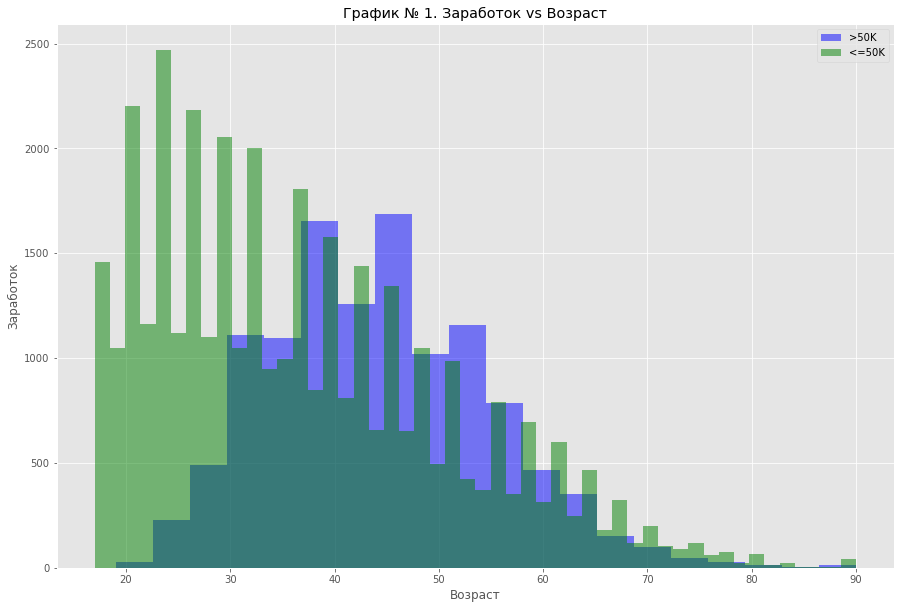

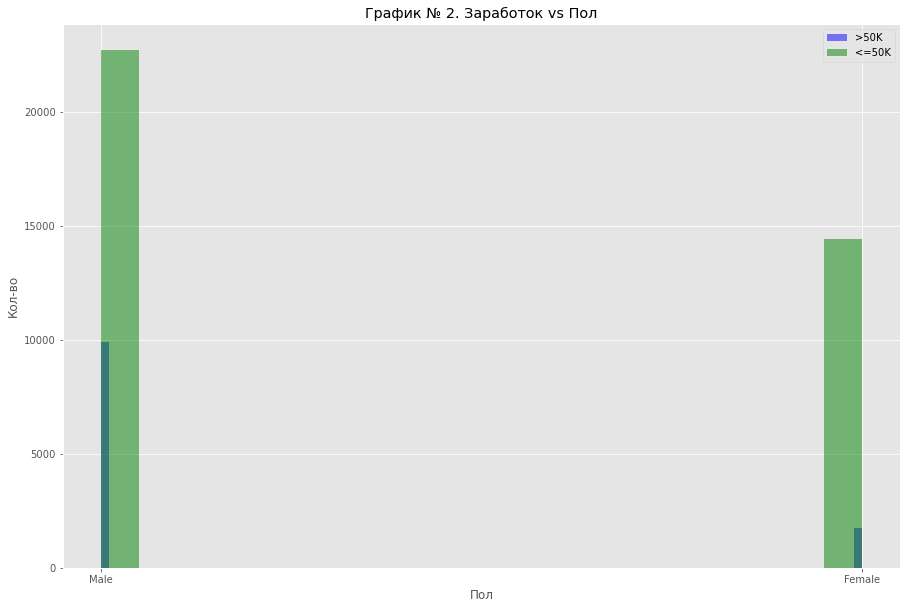

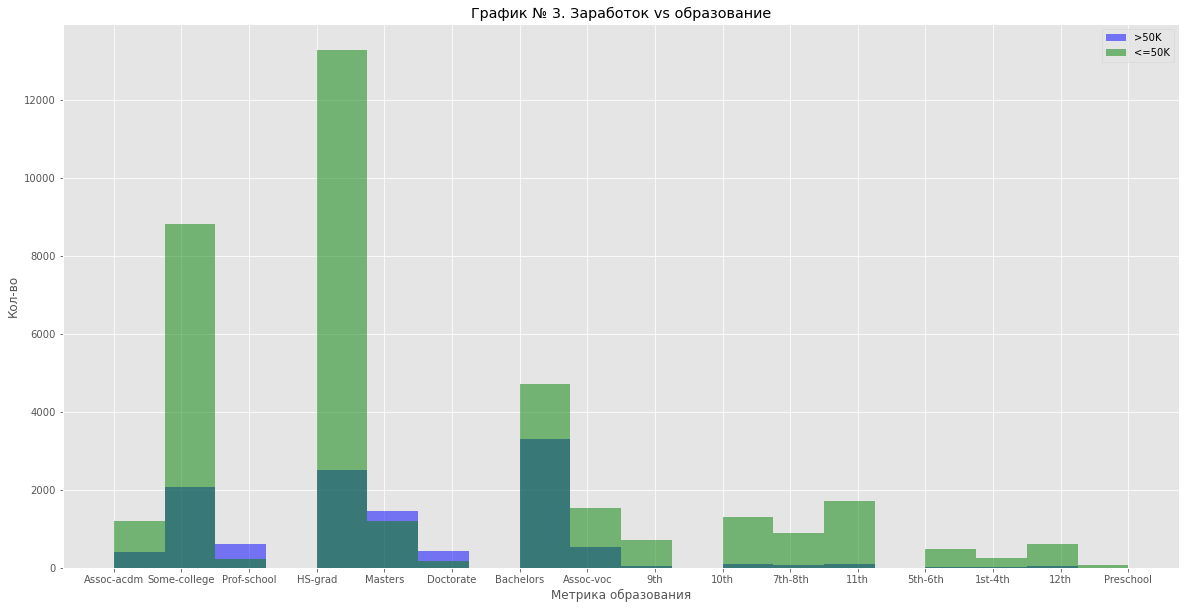

In [134]:


plt.style.use('ggplot')

plt.figure(figsize=(15, 10))
plt.hist(data_mode[data_mode['income_kat'] == 1]['age'], bins=20, alpha=0.5, label='>50K', color = 'Blue')
plt.hist(data_mode[data_mode['income_kat'] == 0]['age'], bins=50, alpha=0.5, label='<=50K', color = 'green')
plt.legend()
plt.xlabel('Возраст')
plt.ylabel('Заработок')
plt.title('График № 1. Заработок vs Возраст')


plt.figure(figsize=(15, 10))
plt.hist(data[data['income_kat'] == 1]['gender'], bins=100, alpha=0.5, label='>50K', color = 'Blue')
plt.hist(data[data['income_kat'] == 0]['gender'], bins=20, alpha=0.5, label='<=50K', color = 'green')
plt.legend()
plt.xlabel('Пол')
plt.ylabel('Кол-во')
plt.title('График № 2. Заработок vs Пол')



plt.figure(figsize=(20, 10))
plt.hist(data[data['income_kat']  == 1]['education'], bins=20, alpha=0.5, label='>50K', color = 'Blue')
plt.hist(data[data['income_kat']  == 0]['education'], bins=20, alpha=0.5, label='<=50K', color = 'green')
plt.legend()
plt.xlabel('Метрика образования')
plt.ylabel('Кол-во')
plt.title('График № 3. Заработок vs образование')


> - По первому графику № 1видна закономерность что больше всего в данных заработок менее 50К, при этом до 45, 50 лет <br>
После 45 лет ситуация меняется и идет на убыль по обоим классам. <br>
> - по графику № 2 женщины зарабатывают более 50К в полтора раза меньше чем мужчины, при этом менее 50 К примерно, в данных, одинаковое кол-во <br>
> - График № 3. В выборке в большинстве своем предатсвлены среднее и высшее образование, при этом более высокий грейд (коледжи и высшее образование) распределяется в большую сторону у мужчин. При более низком образовании заработок 

In [135]:
unique_countries = data_mode['native-country'].unique()
countries_counts = data_mode['native-country'].value_counts()
countries_counts_df = pd.DataFrame({'Countries': unique_countries, 'Count': countries_counts})
countries_counts_df



,Countries,Count
United-States,United-States,44689
Mexico,Peru,951
Philippines,Guatemala,295
Germany,Mexico,206
Puerto-Rico,Dominican-Republic,184
Canada,Ireland,182
El-Salvador,Germany,155
India,Philippines,151
Cuba,Thailand,138
England,Haiti,127


In [136]:
unique_countries1 = adult['native-country'].unique()
countries_counts1 = adult['native-country'].value_counts()
countries_counts_df1 = pd.DataFrame({'Countries': unique_countries1, 'Count': countries_counts1})
# countries_counts_df1

In [137]:
countries_counts_df['Count'].sub(countries_counts_df1['Count']).sort_values(ascending=False)

United-States                 3397
Mexico                          48
Canada                          19
South                           14
Germany                         13
Philippines                     12
Taiwan                          10
China                            9
Puerto-Rico                      9
El-Salvador                      8
England                          8
Dominican-Republic               6
Poland                           6
Haiti                            6
Italy                            5
Portugal                         5
Cuba                             5
India                            4
Vietnam                          3
Iran                             3
Columbia                         3
Jamaica                          3
Japan                            3
Laos                             2
Cambodia                         2
Guatemala                        2
France                           2
Ecuador                          2
Hong                

___

> <b>1. Логистическая регрессия

In [138]:
# Сначала выберем признаки для начала работы
selectedColumns = data_mode[['income_kat', 'workclass', 'education', 'gender', 'race', 'occupation', 'marital-status']]

In [139]:
# столбцы 'workclass', 'education', 'gender', 'hours-per-week', 'race' - категориальные переменные
# переведем ех в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies(selectedColumns)

# столбец 'income_kat' является целевой переменной, удаляем его из Х
del X['income_kat']


X.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [140]:
selectedColumns.head()

,income_kat,workclass,education,gender,race,occupation,marital-status
0,0,Private,11th,Male,Black,Machine-op-inspct,Never-married
1,0,Private,HS-grad,Male,White,Farming-fishing,Married-civ-spouse
2,1,Local-gov,Assoc-acdm,Male,White,Protective-serv,Married-civ-spouse
3,1,Private,Some-college,Male,Black,Machine-op-inspct,Married-civ-spouse
4,0,Private,Some-college,Female,White,Prof-specialty,Never-married


In [141]:
Y = pd.Series(data['income_kat'])
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: income_kat, dtype: int32

In [142]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

> Обучение. <p>
>
> Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
7762,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23881,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
30507,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
28911,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
19484,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15938,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
27828,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
28449,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5647,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [144]:
# обучаем на части датасета (train)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [145]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 0, 0, 0, 1])

In [146]:
model.predict(X_test) # получаем массив

array([0, 0, 0, ..., 0, 0, 0])

In [147]:
model.predict_proba(X_test)

array([[0.98181538, 0.01818462],
       [0.77886635, 0.22113365],
       [0.82409781, 0.17590219],
       ...,
       [0.95401023, 0.04598977],
       [0.67354823, 0.32645177],
       [0.98837265, 0.01162735]])

> Получаем точность предсказания на обучающей и тестовой выборках.

In [148]:
model.score(X_train, Y_train) 

0.8280733569276668

0.7861592910000292 - при использовании категориальных данных: 'workclass', 'education', 'gender', 'race' - для сравнения

In [149]:
model.score(X_test, Y_test)

0.8359380331672696

0.7927386883232103  - при использовании категориальных данных: 'workclass', 'education', 'gender', 'race' - для сравнения

___

> <b> Метод опорных векторов. SVM.

In [150]:
from sklearn.svm import SVC

In [151]:
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree = 10)) 
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=10, kernel='poly'))])

> Получаем точность предсказания на обучающей и тестовой выборках.

In [152]:
clf.score(X_train, Y_train) 

0.8114305770861974

0.7919506273947761  - при использовании категориальных данных: 'workclass', 'education', 'gender', 'race' - для сравнения

In [153]:
clf.score(X_test, Y_test)

0.7979253395209173

0.7934893878386678  - при использовании категориальных данных: 'workclass', 'education', 'gender', 'race' - для сравнения

In [154]:
svc = SVC(kernel='poly', degree = 10)
svc.fit(X_train, Y_train)

SVC(degree=10, kernel='poly')

In [155]:
svc.score(X_train, Y_train)

0.8502442306004855

0.7922431191318845  - при использовании категориальных данных: 'workclass', 'education', 'gender', 'race' - для сравнения

In [156]:
svc.score(X_test, Y_test)

0.8291817375281513

0.793079915375691  - при использовании категориальных данных: 'workclass', 'education', 'gender', 'race' - для сравнения

- Сформулируйте выводы по проделанной работе.
- Кратко опишите какие преобразования были сделаны с данными.
- Сравните точность двух моделей.
- Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат?

> <b>Поэкспериментировав с данными, я пришел к следующему выводу: </b><p>
> 1. использование категориальных данных: 'workclass', 'education', 'gender', 'race' - точность предсканий с среднем ниже на 0,04.. 0,05 
  2. При добалении 'occupation', 'marital-status' - точность предсказний выросла
  3. При добавлении стран, она опять упала, выше был анализ по странам и видно, что практически 90% данных это США.
  4. Исходя из пункта 3 я бы предложил разбивать данные по странам или регионам, так будет более точное предсказание, по моему мнению.
  5. Точность модели обученной на Методе опорных векторов. SVM. выше для обучения, но ниже для тестовых данных. Я так думаю, что это связано с тем, что тестовые данные могли содержать не гегемонные значения США, а могли попасть другие страны. <br>
    Но в SVM степень полиномиальной функции ядра мы можем увеличивать. "Полиномиальное ядро используется в SVM для нелинейной классификации данных. Степень полиномиальной функции ядра определяет, насколько сложной может быть граница принятия решений. Чем выше степень полинома, тем более сложная граница может быть построена."(с) А значить будет точнее модель.
  6. В целом мне понравилось экспериментировать и получать различные модели при изменении данных.
  7. Для улучшения результатов, как я писал ранее, я бы сделал следующее:<br>
    - разделял бы страны <br>
    - для замены пропусков не использовал бы метод mode, а подошел бы более индивиудально к замене пропусков. Возможно использовал бы предсказания (т.е. убрал бы все пропуски, обучил модель, потом используя обученую модель заменил бы все пропуски (пока не очень знаю как это сделать, но подумал, что это могло бы сработать). Либо сделал бы функцию(и), которые бы перебирали бы все похожие выраинты и подставляли значения ближайшие по смыслу и значениям).